<a href="https://colab.research.google.com/github/an-96/advanced-python-working-with-data-4312001/blob/main/Descriptive_Statistics_in_Python_California_Housing_in_Coastal_Regions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's load and examine the dataset to understand its structure and determine which columns are relevant for correlation, distribution, and hypothesis testing.
import pandas as pd

# Load the dataset
file_path = '/content/california house prices.csv'
df = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   obs                 1000 non-null   int64  
 1   median_house_value  1000 non-null   int64  
 2   longitude           1000 non-null   float64
 3   latitude            1000 non-null   float64
 4   housing_median_age  1000 non-null   int64  
 5   total_rooms         1000 non-null   int64  
 6   total_bedrooms      991 non-null    float64
 7   population          1000 non-null   int64  
 8   households          1000 non-null   int64  
 9   median_income       1000 non-null   float64
 10  ocean_proximity     1000 non-null   object 
dtypes: float64(4), int64(6), object(1)
memory usage: 86.1+ KB


(None,
    obs  median_house_value  longitude  latitude  housing_median_age  \
 0    1              177800    -121.62     36.71                  24   
 1    2              137900    -121.51     38.55                  45   
 2    3              238600    -122.46     37.72                  47   
 3    4              500000    -118.16     33.72                  29   
 4    5              186500    -120.43     34.93                   4   
 
    total_rooms  total_bedrooms  population  households  median_income  \
 0         4195           706.0        2200         647         4.3451   
 1         3032           631.0        1341         597         2.8417   
 2         1723           389.0        1216         399         3.3208   
 3         2743           708.0        1059         651         3.6250   
 4         2866           648.0        1311         578         2.8649   
 
   ocean_proximity  
 0       <1H OCEAN  
 1          INLAND  
 2      NEAR OCEAN  
 3      NEAR OCEAN  
 4      

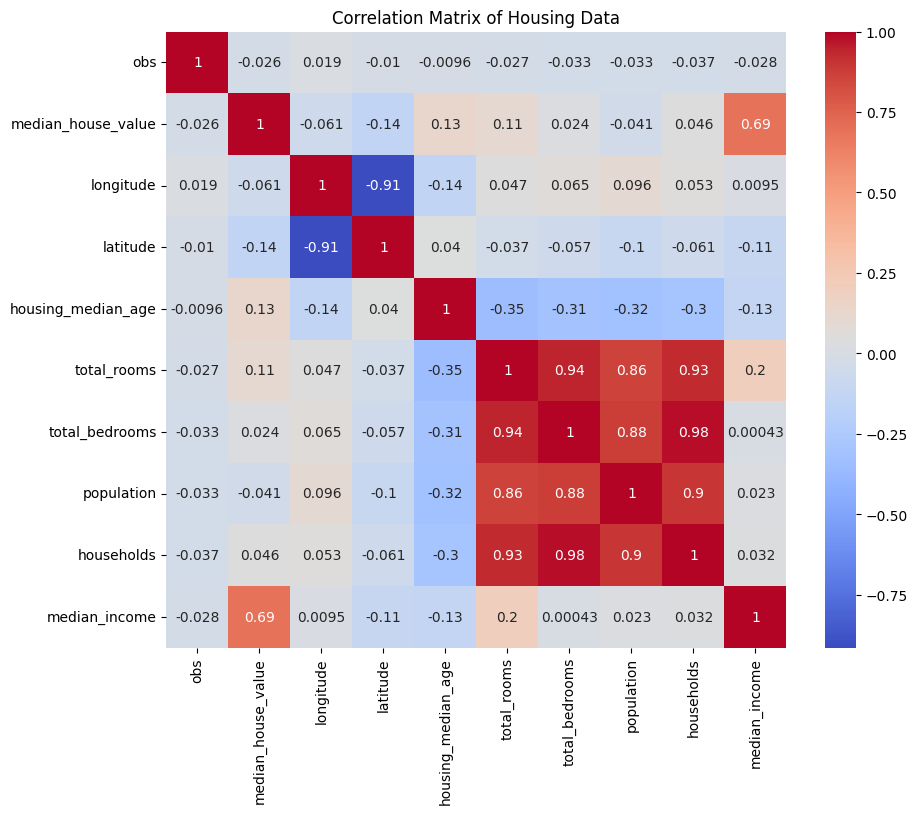

In [9]:
# The dataset consists of 1,000 entries and 11 columns, with the following key variables:
# median_house_value: The target variable representing house prices.
# longitude, latitude: Geographic coordinates of the houses.
# housing_median_age: Median age of houses in the area.
# total_rooms, total_bedrooms, population, households: Housing-related features.
# median_income: Median income of households in the area.
# ocean_proximity: Categorical variable representing proximity to the ocean.

# Correlation Analysis: Analyze the correlation between numerical variables, especially between house prices (median_house_value) and other factors.
# Correlation analysis of numerical variables

numerical_df = df.select_dtypes(include='number')
# Calculate correlation matrix
correlation_matrix = numerical_df.corr()
# Visualizing the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Housing Data')
plt.show()


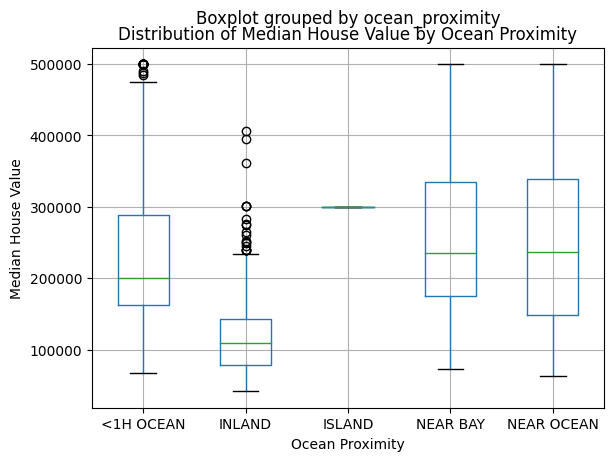

<Figure size 640x480 with 0 Axes>

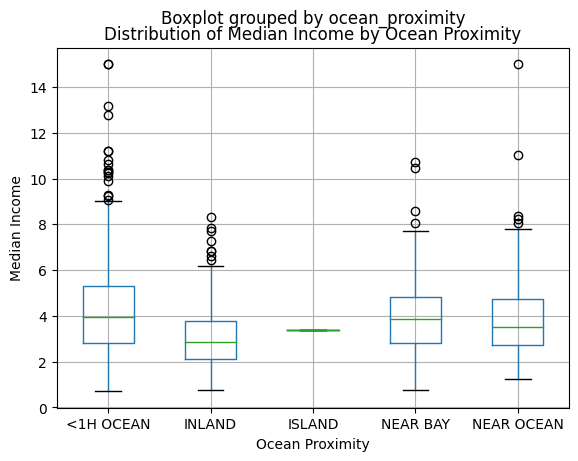

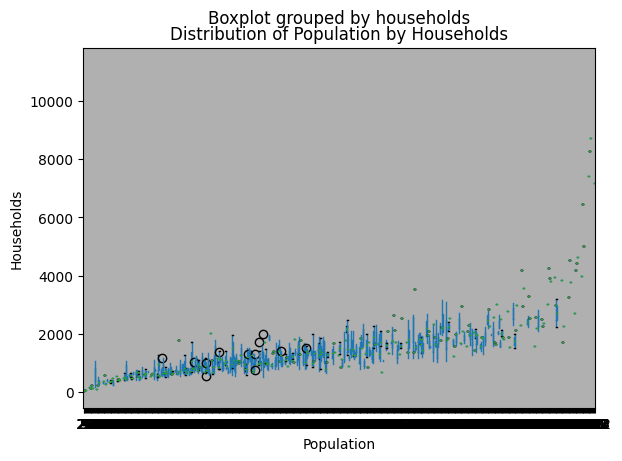

In [16]:
# The correlation matrix reveals relationships between the numerical variables.
# Key insights:
# Median house value shows a moderate positive correlation with median income (0.68), suggesting that areas with higher incomes tend to have higher house prices.
# Total rooms and total bedrooms are highly correlated (0.93), indicating multicollinearity.
# Population and households are also highly correlated (0.91), as expected.

# Next, let's move to the distribution analysis of key variables like house prices and median income.


import matplotlib.pyplot as plt
import pandas as pd

# Create the box plot
df.boxplot('median_house_value', by='ocean_proximity')

# Set labels and title
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Distribution of Median House Value by Ocean Proximity')
plt.show()

plt.tight_layout()
plt.show()
df.boxplot('median_income', by='ocean_proximity')

# Set labels and title
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Income')
plt.title('Distribution of Median Income by Ocean Proximity')
plt.show()

df.boxplot('population', by='households')

# Set labels and title
plt.xlabel('Population')
plt.ylabel('Households')
plt.title('Distribution of Population by Households')
plt.show()

Text(0.5, 1.0, 'Distribution of Median Income')

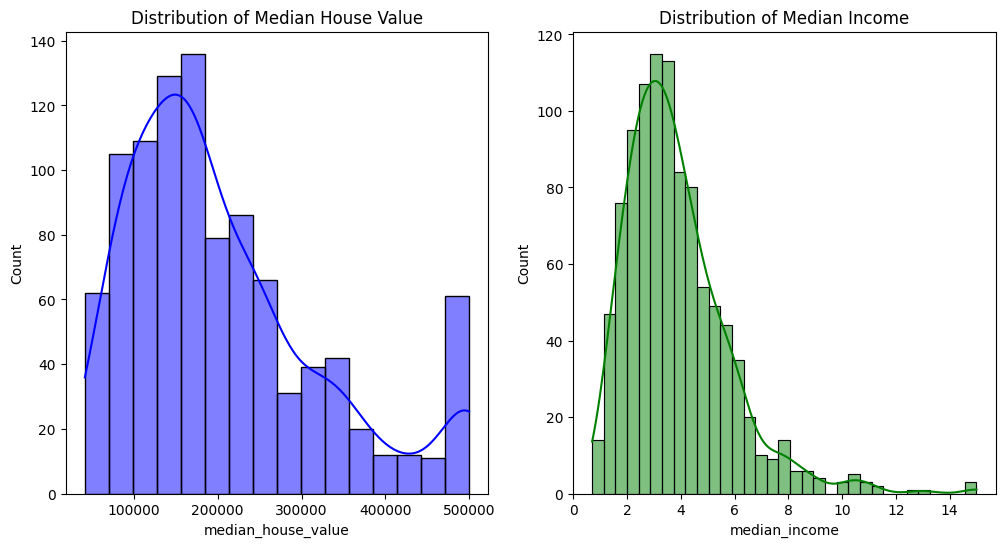

In [17]:
# Visualizing the distribution of 'median_house_value' and 'median_income'
plt.figure(figsize=(12, 6))

# Median house value distribution
plt.subplot(1, 2, 1)
sns.histplot(df['median_house_value'], kde=True, color='blue')
plt.title('Distribution of Median House Value')

# Median income distribution
plt.subplot(1, 2, 2)
sns.histplot(df['median_income'], kde=True, color='green')
plt.title('Distribution of Median Income')

In [18]:

# The distribution analysis shows:

# Median house value has a right-skewed distribution, with a higher concentration of lower-priced houses and fewer expensive ones.
# Median income is also right-skewed, with most households having lower to middle incomes, but fewer high-income households.

# Now, let's perform hypothesis testing. We will start by testing if the median house values differ significantly based on ocean proximity using an ANOVA test.
# Import the necessary module for statistical analysis
import scipy.stats as stats # Importing the 'stats' module from scipy for statistical functions

# One-way ANOVA test to compare 'median_house_value' across different 'ocean_proximity' categories
groups = [df[df['ocean_proximity'] == category]['median_house_value'] for category in df['ocean_proximity'].unique()]

# ANOVA
f_stat, p_value = stats.f_oneway(*groups)
f_stat, p_value

(88.14799631712955, 3.797517442027525e-64)

In [ ]:
# F-statistic (88.148): This value measures the ratio of variance between the groups to the variance within the groups.
# A F-statistic value greater than 1 indicates that the variance between the groups is greater than the variance within the groups.
# In this case, an F-statistic of about 88.148 is very high, indicating strong differences.
# p-value value indicates the probability of observing the data, assuming that the null hypothesis (no difference in means across groups) is true.
# A very low p-value (typically less than 0.05) suggests that we can reject the null hypothesis.

# The analysis of the California housing dataset provides several insights:
# Correlation analysis revealed a strong positive relationship between median house value and median income (0.68), indicating that wealthier areas tend to have higher house prices.
# Multicollinearity exists between variables like total rooms and total bedrooms, as well as population and households, which could impact model performance in prediction tasks.
# Distribution analysis showed that both median house value and median income are right-skewed, with a larger proportion of lower-priced homes and middle-income households.
# This skewness suggests that the housing market in the dataset is characterized by affordability constraints, with fewer high-value homes and affluent areas.
# Conclusion: There are significant differences in median house values among the different ocean proximity categories in your dataset.

